In [34]:
import numpy as np
import pandas as pd


```
ID: Customer ID
Pin-code: Home Area pincode(only 5 pin code)
Age: Customer's age (21-65)
Fam member: Total Family Members(1-4)
Education: Customer's Education
T-Experience: years of professional experience(-3,43)
Income: Annual income of the customer(64000,1792000)
Mortgage: Value of house mortgage if any (0,508000)
Fixed Deposit: Does the customer have a certificate of deposit (CD) account with the bank?
Demat: Does the customer have a Demat account with the bank?
Net Banking: Does the customer use internet banking facilities?
Loan: Did this customer accept the personal loan offered in the last campaign?
```


In [35]:
df=pd.read_csv("loan_dataset.csv")

In [36]:
df.head(2)

,Unnamed: 0,ID,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
0,0,10001,110001,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,1,10002,110014,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no


#Getting insight about the data

In [37]:
df.describe()

,Unnamed: 0,ID,Pin-code,age,Fam members,T.Experience,Income,Mortgage
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03
mean,2499.500000,8.186318e+06,110006.557800,43.338400,2.396400,20.104600,5.901936e+05,4.519904e+05
std,1443.520003,3.638026e+06,4.998725,11.463166,1.147663,11.467954,3.682698e+05,8.137104e+05
min,0.000000,1.000100e+04,110001.000000,21.000000,1.000000,-3.000000,6.400000e+04,0.000000e+00
25%,1249.750000,1.000125e+07,110003.000000,33.000000,1.000000,10.000000,3.120000e+05,0.000000e+00
50%,2499.500000,1.000250e+07,110004.000000,43.000000,2.000000,20.000000,5.120000e+05,0.000000e+00
75%,3749.250000,1.000375e+07,110011.000000,53.000000,3.000000,30.000000,7.840000e+05,8.080000e+05
max,4999.000000,1.000500e+07,110014.000000,65.000000,4.000000,43.000000,1.792000e+06,5.080000e+06


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     5000 non-null   int64  
 1   ID             5000 non-null   int64  
 2   Pin-code       5000 non-null   int64  
 3   age            5000 non-null   int64  
 4   Fam members    5000 non-null   float64
 5   Education      5000 non-null   object 
 6   T.Experience   5000 non-null   float64
 7   Income         5000 non-null   int64  
 8   Mortgage       5000 non-null   int64  
 9   Fixed Deposit  5000 non-null   object 
 10  Demat          5000 non-null   object 
 11  Net Banking    5000 non-null   object 
 12  Loan           5000 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 507.9+ KB


# Dropping unnecessary columns & rows

In [39]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [40]:
df['ID'].nunique()

5000

In [41]:
df.drop('ID',axis=1,inplace=True)#Since all the customers are with unique

In [42]:
df.duplicated().sum()

np.int64(9)

In [43]:
df.drop_duplicates(inplace=True)# Since 9 rows are the same

In [44]:
df.isnull().sum()

Pin-code         0
age              0
Fam members      0
Education        0
T.Experience     0
Income           0
Mortgage         0
Fixed Deposit    0
Demat            0
Net Banking      0
Loan             0
dtype: int64

# Changing datatype

In [45]:
df['Pin-code']=df['Pin-code'].astype('category')

In [46]:
df['Fam members'].value_counts()

Fam members
1.0    1470
2.0    1293
4.0    1220
3.0    1008
Name: count, dtype: int64

In [47]:
df['Fam members']=df['Fam members'].astype('category')

In [48]:
df['Education'].replace({'Under Graduate':0,'Post Graduate':1,'Graduate':2},inplace=True)
df['Education']=df['Education'].astype('category')

C:\temp\ipykernel_13360\2251079288.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education'].replace({'Under Graduate':0,'Post Graduate':1,'Graduate':2},inplace=True)
C:\temp\ipykernel_13360\2251079288.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'].replace({'Under Grad

In [49]:
df['T.Experience'].unique()

array([ 1., 19., 15.,  9.,  8., 13., 27., 24., 10., 39.,  5., 23., 32.,
       41., 30., 14., 18., 21., 28., 31., 11., 16., 20., 35.,  6., 25.,
        7., 12., 26., 37., 17.,  2., 36., 29.,  3., 22., -1., 34.,  0.,
       38., 40., 33.,  4., -2., 42., -3., 43.])

In [50]:
df['T.Experience']=df['T.Experience'].astype('int')

In [51]:
df['Income']=df['Income'].astype('int')

In [52]:
df['Mortgage']=df['Mortgage'].astype('int')

In [53]:
df.columns

Index(['Pin-code', 'age', 'Fam members', 'Education', 'T.Experience', 'Income',
       'Mortgage', 'Fixed Deposit', 'Demat', 'Net Banking', 'Loan'],
      dtype='object')

In [54]:
columns=['Fixed Deposit', 'Demat', 'Net Banking', 'Loan']
for column in columns:
  print(df[column].value_counts())
  df[column].replace({'no':0,'yes':1},inplace=True)
  df[column]=df[column].astype('category')

C:\temp\ipykernel_13360\993962828.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace({'no':0,'yes':1},inplace=True)
C:\temp\ipykernel_13360\993962828.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].replace({'no':0,'yes':1},inplace=True)
C:\temp\ipykernel_13360\9939

Fixed Deposit
no     4689
yes     302
Name: count, dtype: int64
Demat
no     4470
yes     521
Name: count, dtype: int64
Net Banking
yes    2979
no     2012
Name: count, dtype: int64
Loan
no     4511
yes     480
Name: count, dtype: int64


C:\temp\ipykernel_13360\993962828.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].replace({'no':0,'yes':1},inplace=True)


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4991 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Pin-code       4991 non-null   category
 1   age            4991 non-null   int64   
 2   Fam members    4991 non-null   category
 3   Education      4991 non-null   category
 4   T.Experience   4991 non-null   int64   
 5   Income         4991 non-null   int64   
 6   Mortgage       4991 non-null   int64   
 7   Fixed Deposit  4991 non-null   category
 8   Demat          4991 non-null   category
 9   Net Banking    4991 non-null   category
 10  Loan           4991 non-null   category
dtypes: category(7), int64(4)
memory usage: 230.1 KB


# Little Analysis

```
If technical experience is less than zero there might have been a mistake in filling a form hence loan not approved.

Loan has high corelation with
Education 0.127
Income	0.502621
Mortgage	0.141822
Fixed Deposit	0.316254
Demat 0.021990
```

In [56]:
df[df['Mortgage']==0]['Loan'].value_counts()

Loan
0    3141
1     312
Name: count, dtype: int64

In [57]:
len(df[df['T.Experience']<0])

52

df.groupby('Pin-code')['Loan'].value_counts()

In [58]:
columns=['Pin-code','Fixed Deposit', 'Demat', 'Net Banking', 'Education']
for column in columns:
  print(pd.crosstab(df[column],df['Loan']))
  print()

Loan        0    1
Pin-code          
110001    931   87
110003    878   95
110004    917  107
110011    885  103
110014    900   88

Loan              0    1
Fixed Deposit           
0              4349  340
1               162  140

Loan      0    1
Demat           
0      4050  420
1       461   60

Loan            0    1
Net Banking           
0            1823  189
1            2688  291

Loan          0    1
Education           
0          1997   93
1          1295  205
2          1219  182



In [59]:
df.head(2)

,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
0,110001,23,4.0,0,1,392000,0,0,1,0,0
1,110014,43,3.0,0,19,272000,0,0,1,0,0


In [60]:
columns=['age','T.Experience','Income','Mortgage']
for column in columns:
  df[column]=(df[column]-df[column].min())/(df[column].max()-df[column].min())

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Pin-code'] = le.fit_transform(df['Pin-code'])

In [62]:
df.head()

,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
0,0,0.045455,4.0,0,0.086957,0.189815,0.0,0,1,0,0
1,4,0.500000,3.0,0,0.478261,0.120370,0.0,0,1,0,0
2,4,0.363636,1.0,0,0.391304,0.013889,0.0,0,0,0,0
3,1,0.272727,1.0,2,0.260870,0.425926,0.0,0,0,0,0
4,2,0.272727,4.0,2,0.239130,0.171296,0.0,0,0,0,0


# Insight about Loan Columns

In [63]:
df['Loan'].value_counts()

Loan
0    4511
1     480
Name: count, dtype: int64

In [64]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [65]:
X=df.drop(columns=['Loan'])
y=df['Loan']

In [66]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [67]:
print(y.value_counts())
y_res.value_counts()

Loan
0    4511
1     480
Name: count, dtype: int64


Loan
0    4511
1    4511
Name: count, dtype: int64

In [68]:
df.corr()['Loan']

Pin-code         0.006884
age             -0.007748
Fam members      0.061445
Education        0.127917
T.Experience    -0.007446
Income           0.502621
Mortgage         0.141822
Fixed Deposit    0.316254
Demat            0.021990
Net Banking      0.006235
Loan             1.000000
Name: Loan, dtype: float64

#Model Training

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42,stratify=y_res)

In [71]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20, min_child_weight=0.001,
                                 min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                 num_leaves=31, objective=None,
                                 random_state=5176, reg_alpha=0.0,
                                 reg_lambda=0.0, subsample=1.0,
                                 subsample_for_bin=200000, subsample_freq=0)
clf.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3609, number of negative: 3608
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1043
[LightGBM] [Info] Number of data points in the train set: 7217, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500069 -> initscore=0.000277
[LightGBM] [Info] Start training from score 0.000277


LGBMClassifier(n_jobs=-1, random_state=5176)

In [72]:
y_pred=clf.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9889


In [74]:
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[890  13]
 [  7 895]]

True Positives(TP) =  890

True Negatives(TN) =  895

False Positives(FP) =  13

False Negatives(FN) =  7


In [76]:
import seaborn as sns

<Axes: >

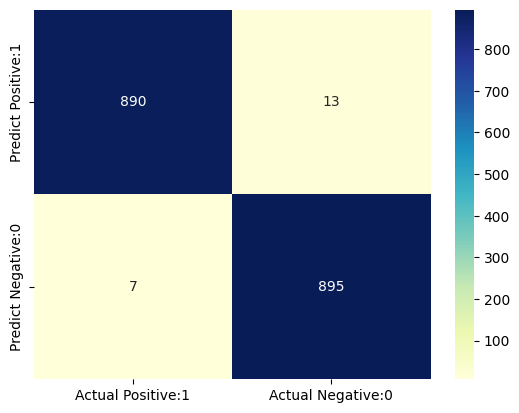

In [77]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       903
           1       0.99      0.99      0.99       902

    accuracy                           0.99      1805
   macro avg       0.99      0.99      0.99      1805
weighted avg       0.99      0.99      0.99      1805



In [79]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt

In [80]:
roc_auc_score(y_test, y_pred, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)

np.float64(0.9889215057961513)

In [81]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

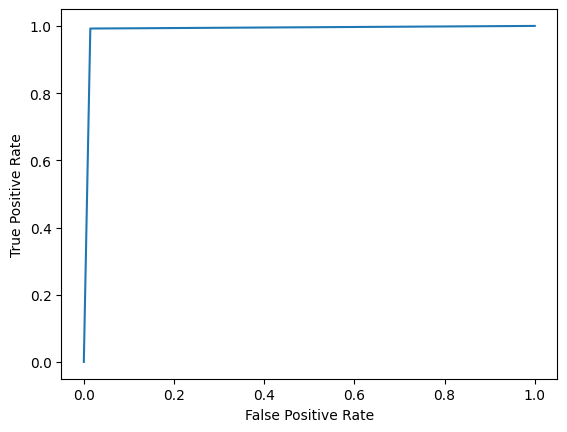

In [82]:
plot_roc_curve(y_test, y_pred)

In [83]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))